In [1]:
pip install mlflow

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 15.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.5/83.5 KB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 KB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.9/96.9 KB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 KB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.1/148.1 KB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 KB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 KB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 KB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 KB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 20.0 MB/s

In [3]:
import mlflow as ml
import os
from random import random, randint
from mlflow import log_metric, log_param, log_params, log_artifacts





In [4]:
log_param("config_value", randint(0, 100))

# Log a dictionary of parameters
log_params({"param1": randint(0, 100), "param2": randint(0, 100)})

# Log a metric; metrics can be updated throughout the run
log_metric("accuracy", random() / 2.0)
log_metric("accuracy", random() + 0.1)
log_metric("accuracy", random() + 0.2)

# Log an artifact (output file)
if not os.path.exists("outputs"):
    os.makedirs("outputs")
with open("outputs/test.txt", "w") as f:
    f.write("hello world!")
log_artifacts("outputs")

In [11]:
import matplotlib.pyplot as plt

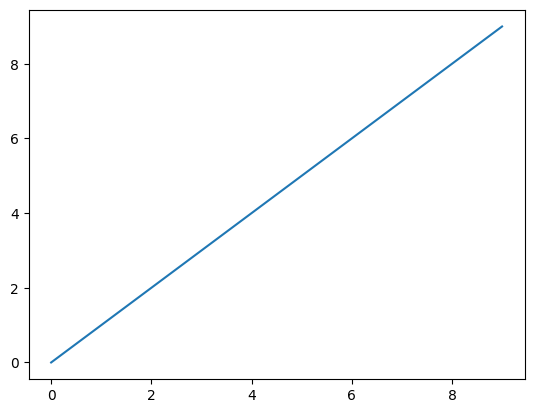

In [16]:
p = plt.plot(range(0,10), range(0,10))
plt.savefig("outputs/test.png")

In [18]:
log_artifacts("outputs")

In [ ]:
ml.end_run()

# New experiment

In [43]:
# create experiment
# first do a search 
search = ml.search_experiments()
exp_names =[ex.name for ex in search]
exp_names

# then do a safety
if "test_1" not in exp_names:
    ml_exp = ml.create_experiment("test_1", tags={"test":2})
else:
    print("experiment exists")


experiment exists


In [35]:
# Set a experiment if needed
# return experiment info
exp_id  = ml.get_experiment_by_name(name="test_1")
# set experiment by name of experiment
ml.set_experiment("test_1")

<Experiment: artifact_location='file:///home/twj8/pymc_bart/mlruns/241390813096185889', creation_time=1690376578232, experiment_id='241390813096185889', last_update_time=1690376578232, lifecycle_stage='active', name='test_1', tags={}>

In [36]:
# where an experiment is located
ml.get_tracking_uri()

'file:///home/twj8/pymc_bart/mlruns'

In [58]:
# start a run
# rn is a run object
rn = ml.start_run(run_name = "run1")

# run details
rn.info

<RunInfo: artifact_uri='file:///home/twj8/pymc_bart/mlruns/241390813096185889/4fff277a362c4a95a0044e65fe10c0d7/artifacts', end_time=None, experiment_id='241390813096185889', lifecycle_stage='active', run_id='4fff277a362c4a95a0044e65fe10c0d7', run_name='run1', run_uuid='4fff277a362c4a95a0044e65fe10c0d7', start_time=1690378600075, status='RUNNING', user_id='twj8'>

In [52]:
# end a run
ml.end_run()

In [62]:
# get run with more details
ml.get_run(rn.info.run_id)

# show run status
print(f"is run {rn.info.run_name} running {rn.info.status}")

is run run1 running RUNNING


In [63]:
ml.log_metric("test_n", 3)